<h1 style="font-family:verdana;"> <center>World Air Quality Index by City and Coordinates</center> </h1>
<p><center style="color:#159364; font-family:cursive;">Peace </center></p>

***

<br>

![](https://www.esa.int/var/esa/storage/images/esa_multimedia/images/2004/10/global_air_pollution_map_produced_by_envisat_s_sciamachy/9588991-3-eng-GB/Global_air_pollution_map_produced_by_Envisat_s_SCIAMACHY_pillars.jpg)

<br>

<div style='color: #216969;
           background-color: #EAF6F6;
           font-size: 200%;
           border-radius:15px;
           margin-top: 5px;
           text-align:center;
           font-weight:600;
           border-style: solid;
           border-color: dark green;
           font-family: "Verdana";'>
 📕Data Dictionary
<a class="anchor" id="1"></a> 

**About Dataset**                                                                                                
------------------------------------------------------------------------------------------------------------------- 
**`Sulfur Dioxide (SO2)`:** SO2 is a gas produced by the burning of fossil fuels, particularly in industrial processes. It can have harmful effects on human health, leading to respiratory issues and exacerbating asthma and other respiratory conditions. 

**`Nitrogen Dioxide (NO2)`:** NO2 is a gas produced by the burning of fossil fuels, primarily in vehicles and power plants. Exposure to high levels of NO2 can irritate the respiratory system and contribute to the development of respiratory conditions. 

**`Air Quality Index (AQI)`:** AQI is a measure used to communicate the level of air pollution in a specific area. It is often calculated based on the concentrations of various pollutants, such as PM2.5, ozone, CO, SO2, and NO2. The AQI provides a standardized scale to help individuals understand the air quality and take necessary precautions to protect their health. 

**`Good`:** The "Good" category on the AQI scale indicates that the air quality is satisfactory, and there is little to no health risk associated with it. 

**`Moderate`:** The "Moderate" category signifies that the air quality is acceptable, but there may be a moderate health concern for a small number of individuals, particularly those who are unusually sensitive to air pollution. 

**`Unhealthy for Sensitive Groups`:** This category indicates that the air quality is of concern for individuals who are more vulnerable to the effects of air pollution, such as children, older adults, and people with respiratory or cardiovascular conditions.

**`Unhealthy`:** The "Unhealthy" category suggests that the general population may start to experience health effects due to the poor air quality. It is advisable to limit outdoor activities and take necessary precautions.

**`Very Unhealthy`:** The "Very Unhealthy" category signifies a significant health risk from the air pollution. It is recommended to avoid outdoor activities and minimize exposure to the polluted air.

**`Hazardous`:** The "Hazardous" category indicates the highest level of air pollution, posing a severe health risk. It is crucial to stay indoors, use air filtration systems, and follow local authorities' guidance to protect health.


<div style='color: #216969;
           background-color:#EAF6F6;
           font-size: 200%;
           border-radius:15px;
           text-align:center;
           font-weight:600;
           border-style: solid;
           border-color: dark green;
           font-family: "Verdana";'>
🏗️Import Necessary Libraries
<a class="anchor" id="2"></a> 

In [1]:
# Data Wrangling libraries
import numpy as np
import pandas as pd
import scipy.stats as stats
import datetime

# Visualization Libraries
from IPython.display import display,HTML
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

<div style='color: #216969;
           background-color: #EAF6F6;
           font-size: 200%;
           border-radius:15px;
           text-align:center;
           font-weight:600;
           border-style: solid;
           border-color: dark green;
           font-family: "Verdana";'>
📥Importing the Dataset<a class="anchor" id="3"></a> 

<table align="left">
    <tr>
        <td width="8%">
            <img src="OIP.jpg">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Read and display data to get insights from the data.
                    </b> 
                </font>
            </div>
        </td>
    </tr>
</table>

In [43]:
data = pd.read_csv('AQI and Lat Long of Countries.csv')

In [44]:
data.head()

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category,lat,lng
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate,44.7444,44.2031
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good,-5.2900,-44.4900
2,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good,-11.2958,-41.9869
3,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate,37.1667,15.1833
4,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good,53.0167,20.8833


<div style='color: #216969;
           background-color: #EAF6F6;
           font-size: 200%;
           border-radius:15px;
           text-align:center;
           font-weight:600;
           border-style: solid;
           border-color: dark green;
           font-family: "Verdana";'>
🧹Data Cleaning and Preprocessing<a class="anchor" id="3"></a> 

<table align="left">
    <tr>
        <td width="10%">
            <img src="OIP.jpg">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Data preparation is the process of cleaning and transforming raw data before building predictive models. <br><br>
                        1. Check dimensions of the dataframe in terms of rows and columns <br>
                        2. Check the data types. If not as per business context, change the data types  <br>
                        3. Study Summary Statistics <br>
                        6. Check for missing values<br>
                        7. Study correlation<br>
                        8. Analyze relationship between numeric and categoric variables <br><br>
                        Note: It is an art to explore data and one will need more and more practice to gain expertise in this area. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

## 1.📦Understand the Data

**Let us now see the number of variables and observations in the data.**

In [4]:
print('Number of rows:', data.shape[0])

Number of rows: 16695


In [5]:
print('Number of columns:', data.shape[1])

Number of columns: 14


##### We see the dataframe has 14 columns and 16695 rows. It means there are 14 variables and 16695 observations.

## 2.🔭Data Type

**Data has a variety of data types. The main types stored in pandas dataframes are object, float, int64, bool and datetime64. In order to learn about each attribute, it is always good for us to know the data type of each column.**

**1. 🪄Check the data type.**

In [6]:
data.dtypes

Country                object
City                   object
AQI Value               int64
AQI Category           object
CO AQI Value            int64
CO AQI Category        object
Ozone AQI Value         int64
Ozone AQI Category     object
NO2 AQI Value           int64
NO2 AQI Category       object
PM2.5 AQI Value         int64
PM2.5 AQI Category     object
lat                   float64
lng                   float64
dtype: object

### 2.Summary Statistics

Here we take a look at the summary of each attribute. This includes the count, mean, the minimum and maximum values as well as some percentiles for numeric variables and count, unique, top, frequency for other variable types.

In [7]:
data.describe(include ='all')

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category,lat,lng
count,16393,16695,16695.000000,16695,16695.000000,16695,16695.000000,16695,16695.000000,16695,16695.000000,16695,16695.000000,16695.000000
unique,174,14229,NaN,6,NaN,3,NaN,5,NaN,2,NaN,6,NaN,NaN
top,United States of America,Santa Cruz,NaN,Good,NaN,Good,NaN,Good,NaN,Good,NaN,Good,NaN,NaN
freq,3954,17,NaN,7708,NaN,16691,NaN,15529,NaN,16684,NaN,7936,NaN,NaN
mean,NaN,NaN,62.998682,NaN,1.342138,NaN,31.767355,NaN,3.819647,NaN,59.821324,NaN,30.267148,-3.944485
std,NaN,NaN,43.091971,NaN,2.371379,NaN,22.839343,NaN,5.880677,NaN,43.208298,NaN,22.947398,73.037148
min,NaN,NaN,7.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN,-54.801900,-171.750000
25%,NaN,NaN,38.500000,NaN,1.000000,NaN,20.000000,NaN,0.000000,NaN,34.000000,NaN,16.515450,-75.180000
50%,NaN,NaN,52.000000,NaN,1.000000,NaN,29.000000,NaN,2.000000,NaN,52.000000,NaN,38.815800,5.643100
75%,NaN,NaN,69.000000,NaN,1.000000,NaN,38.000000,NaN,5.000000,NaN,69.000000,NaN,46.683300,36.275000


In [45]:
data.isnull().sum()

Country               302
City                    0
AQI Value               0
AQI Category            0
CO AQI Value            0
CO AQI Category         0
Ozone AQI Value         0
Ozone AQI Category      0
NO2 AQI Value           0
NO2 AQI Category        0
PM2.5 AQI Value         0
PM2.5 AQI Category      0
lat                     0
lng                     0
dtype: int64

In [46]:
data.dropna(axis=1, inplace=True)

<div style='color: #216969;
           background-color: #EAF6F6;
           font-size: 200%;
           border-radius:15px;
           text-align:center;
           font-weight:600;
           border-style: solid;
           border-color: dark green;
           font-family: "Verdana";'>
📈Exploratory Data Analysis and Visualization<a class="anchor" id="3"></a> 

**Distribution of the AQI Values**

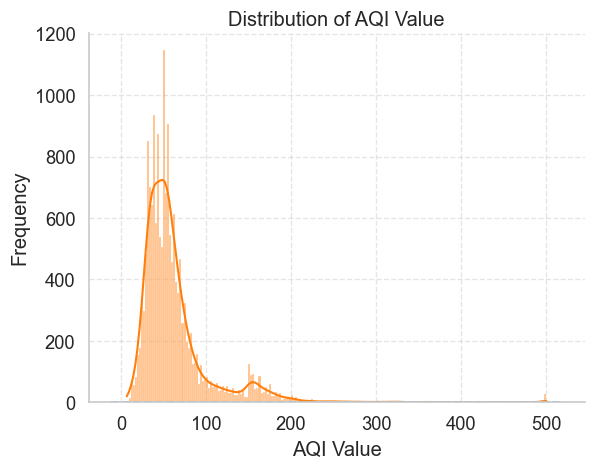

In [47]:
# Set the style for seaborn
sns.set(style='whitegrid', font_scale=1.2)

# Define custom colors
colors = ['#FF7F0E', '#1F77B4']

# Plot the histogram with a kernel density estimate (kde)
sns.histplot(data['AQI Value'], kde=True, color=colors[0])

# Set plot title and labels
plt.title('Distribution of AQI Value')
plt.xlabel('AQI Value')
plt.ylabel('Frequency')

# Add grid lines to the plot
plt.grid(True, linestyle='--', alpha=0.5)

# Remove the right and top spines
sns.despine()

# Customize the plot aesthetics
plt.rcParams['patch.edgecolor'] = 'black'
plt.rcParams['patch.linewidth'] = 0.5

# Customize the KDE line color
sns.kdeplot(data['AQI Value'], color=colors[1], linestyle='--')

# Show the plot
plt.show()

In [11]:
import plotly.express as px
df = data
fig = px.scatter(df, x="AQI Value", y="PM2.5 AQI Value")
fig.show()

**Distribution of AQI categories**

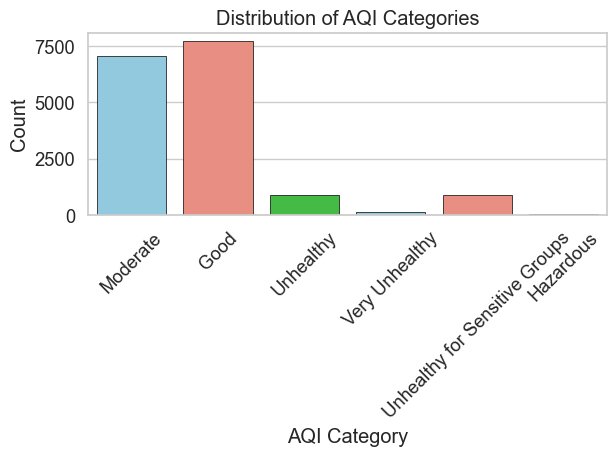

In [12]:
color_palette = ['skyblue', 'salmon', 'limegreen']

# Create a countplot with the specified color palette
sns.countplot(data=data, x='AQI Category', palette=color_palette)

plt.title('Distribution of AQI Categories')
plt.xlabel('AQI Category')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees
plt.tight_layout()  # Adjust the plot layout to prevent overlapping
plt.show()

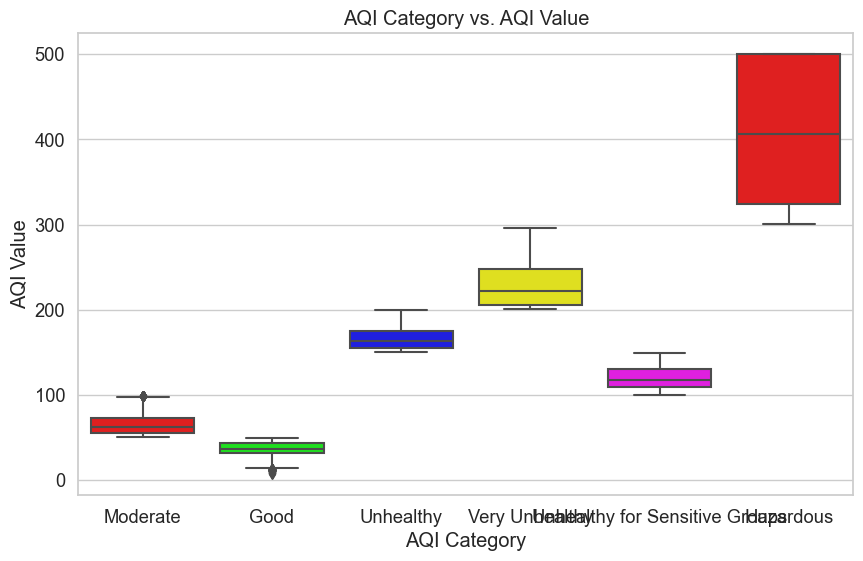

In [13]:
colors = ["#FF0000", "#00FF00", "#0000FF", "#FFFF00", "#FF00FF"]

plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='AQI Category', y='AQI Value', palette=colors)
plt.title('AQI Category vs. AQI Value')
plt.xlabel('AQI Category')
plt.ylabel('AQI Value')
plt.show()

**Geographic distribution of cities**

In [49]:
import plotly.express as px

# Create the scatter plot
fig = px.scatter(data, x='lng', y='lat', color='lng', opacity=0.5,
                 title='Geographic Distribution of Cities', labels={'lng': 'Longitude', 'lat': 'Latitude'},
                 color_continuous_scale='Viridis')

# Show the plot
fig.show()

**Comparison of AQI Categories by Pollutant**

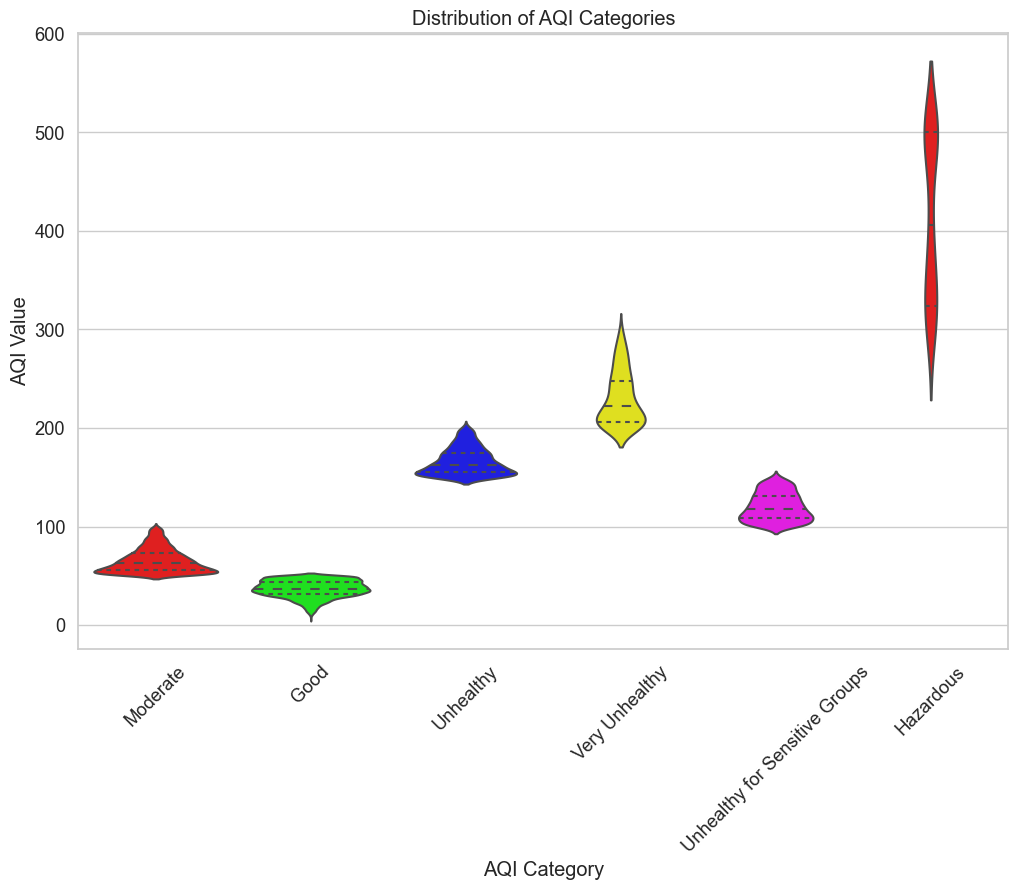

In [14]:
colors = ["#FF0000", "#00FF00", "#0000FF", "#FFFF00", "#FF00FF"]

plt.figure(figsize=(12, 8))
sns.violinplot(data=data, x='AQI Category', y='AQI Value', palette=colors, inner='quartile')
plt.title('Distribution of AQI Categories')
plt.xlabel('AQI Category')
plt.ylabel('AQI Value')
plt.xticks(rotation=45)
plt.show()

**Correlation Matrix of Pollutant AQI Values**

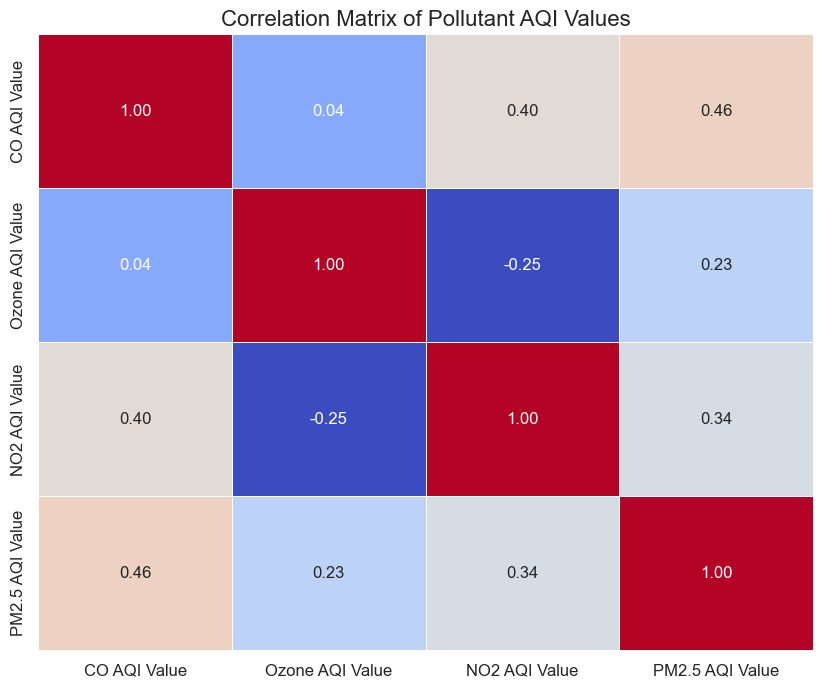

In [15]:
corr_matrix = data[['CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, annot_kws={"size": 12}, cbar=False)
plt.title('Correlation Matrix of Pollutant AQI Values', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


In [16]:
corr_matrix

,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value
CO AQI Value,1.000000,0.039752,0.399566,0.458846
Ozone AQI Value,0.039752,1.000000,-0.251169,0.233031
NO2 AQI Value,0.399566,-0.251169,1.000000,0.341455
PM2.5 AQI Value,0.458846,0.233031,0.341455,1.000000


The correlation matrix illustrates the correlations between the AQI values of a number of various pollutants, including CO, Ozone, NO2, and PM2.5. This gives us a better understanding of the degree to which various pollutants are associated with one another and how their presence affects the overall air quality index. The correlation values reveal whether the AQI readings of various contaminants have a tendency to rise or fall together.

**Scatterplot Matrix of Pollutant AQI Values**

In [31]:
import plotly.graph_objects as go

# Define the data and variables
data = data[['CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value']]

# Create the scatterplot matrix
fig = go.Figure(data=go.Splom(
    dimensions=[
        dict(label='CO AQI Value', values=data['CO AQI Value']),
        dict(label='Ozone AQI Value', values=data['Ozone AQI Value']),
        dict(label='NO2 AQI Value', values=data['NO2 AQI Value']),
        dict(label='PM2.5 AQI Value', values=data['PM2.5 AQI Value'])
    ],
    marker=dict(color=data['PM2.5 AQI Value'], colorscale='Viridis', showscale=True)
))

# Set axis titles and layout
fig.update_layout(
    title='Scatterplot Matrix of Pollutant AQI Values',
    height=600,
    width=600,
    scene=dict(
        xaxis=dict(title='CO AQI Value'),
        yaxis=dict(title='Ozone AQI Value'),
        zaxis=dict(title='NO2 AQI Value')
    )
)

# Show the plot
fig.show()

**Top polluted Cities**

In [42]:
data.head()

,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value
0,1,36,0,51
1,1,5,1,41
2,1,5,1,41
3,1,39,2,66
4,1,34,0,20


In [50]:
import plotly.express as px

# Calculate the average AQI value for each country
country_avg_aqi = data.groupby('City')['AQI Value'].mean().reset_index()

# Sort the countries based on average AQI value in descending order
top_polluted_countries = country_avg_aqi.sort_values('AQI Value', ascending=False).head(10)

# Create the bar plot
fig = px.bar(top_polluted_countries, x='City', y='AQI Value', color='AQI Value',
             title='Top Polluted Countries by Average AQI Value',
             labels={'City': 'Country', 'AQI Value': 'Average AQI Value'},
             color_continuous_scale='Viridis')

# Show the plot
fig.show()

On the basis of the exploratory data analysis (EDA) that was performed on the dataset that was provided concerning the quality of the air, one can reach the following conclusions:

The overall quality of the air is as follows: The bulk of the AQI values that have been recorded fall into the "Good" to "Moderate" categories, indicating that the air quality in many different regions is to some extent acceptable. However, there are also cases in which the AQI values are greater than usual, which indicates that the air quality is worse.

* **Pollutant Contribution:** PM2.5, NO4, CO, and ozone are the four main pollutants that are detected, and they are the ones that contribute the most to air pollution. The degree to which these pollutants are correlated with one another varies, which suggests that there may be interactions between them and shared sources.

* The Top Five Most Polluted Countries: Based on the AQI values that were obtained, the analysis reveals the countries that have maintained a persistently low air quality. If these countries are identified, it will be easier to direct resources and activities toward improving the air quality in those areas.

*Geospatial Analysis:* Using latitude and longitude information to create a visual representation of the geographic distribution of air quality helps to identify parts of the country with greater levels of pollution. It's possible that certain locations will have clusters of dirty areas, which would indicate that the pollution is coming from nearby sources.

In conclusion, the Environmental Defense Agency (EDA) gives useful insights into air quality, pollutant contributions, geographical patterns, and potential possibilities for further analysis. These findings have the potential to improve decision-making processes, the creation of policies, and targeted actions aimed at improving air quality and mitigating the effects of climate change.